In [39]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [40]:
bfridaydf=pd.read_csv('BlackFriday.csv')
bfridaydf.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,NaN,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [41]:
bfridaydf.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [42]:
bfridaydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537452 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [43]:
bfridaydf.drop(['User_ID','Product_ID','Stay_In_Current_City_Years'],axis=1,inplace=True)
bfridaydf.head()

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,0,3,NaN,NaN,8370
1,F,0-17,10,A,0,1,6.0,14.0,15200
2,F,0-17,10,A,0,12,NaN,NaN,1422
3,F,0-17,10,NaN,0,12,14.0,NaN,1057
4,M,55+,16,C,0,8,NaN,NaN,7969


In [44]:
bfridaydf['City_Category']=bfridaydf['City_Category'].fillna('C')
bfridaydf.head()

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,0,3,NaN,NaN,8370
1,F,0-17,10,A,0,1,6.0,14.0,15200
2,F,0-17,10,A,0,12,NaN,NaN,1422
3,F,0-17,10,C,0,12,14.0,NaN,1057
4,M,55+,16,C,0,8,NaN,NaN,7969


In [45]:
bfridaydf['City_Category']=bfridaydf['City_Category'].map({
    'A':'Metro',
    'B':'Town',
    'C':'Village'
})
bfridaydf.head(10)

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,Metro,0,3,NaN,NaN,8370
1,F,0-17,10,Metro,0,1,6.0,14.0,15200
2,F,0-17,10,Metro,0,12,NaN,NaN,1422
3,F,0-17,10,Village,0,12,14.0,NaN,1057
4,M,55+,16,Village,0,8,NaN,NaN,7969
5,M,26-35,15,Metro,0,1,2.0,NaN,15227
6,M,46-50,7,Village,1,1,8.0,17.0,19215
7,M,46-50,7,Town,1,1,15.0,NaN,15854
8,M,46-50,7,Town,1,1,16.0,NaN,15686
9,M,26-35,20,Metro,1,8,NaN,NaN,7871


In [46]:
bfridaydf=bfridaydf.rename(columns={
    'Product_Category_1':'Baseball Caps',
    'Product_Category_2':'Wine Tumblers',
    'Product_Category_3':'Pet Raincoats'
})
bfridaydf.head(2)

,Gender,Age,Occupation,City_Category,Marital_Status,Baseball Caps,Wine Tumblers,Pet Raincoats,Purchase
0,F,0-17,10,Metro,0,3,NaN,NaN,8370
1,F,0-17,10,Metro,0,1,6.0,14.0,15200


In [47]:
bfridaydf['Marital_Status']=bfridaydf['Marital_Status'].map({
    1:'Married',
    0:'Un-married'
})
bfridaydf.head(10)

,Gender,Age,Occupation,City_Category,Marital_Status,Baseball Caps,Wine Tumblers,Pet Raincoats,Purchase
0,F,0-17,10,Metro,Un-married,3,NaN,NaN,8370
1,F,0-17,10,Metro,Un-married,1,6.0,14.0,15200
2,F,0-17,10,Metro,Un-married,12,NaN,NaN,1422
3,F,0-17,10,Village,Un-married,12,14.0,NaN,1057
4,M,55+,16,Village,Un-married,8,NaN,NaN,7969
5,M,26-35,15,Metro,Un-married,1,2.0,NaN,15227
6,M,46-50,7,Village,Married,1,8.0,17.0,19215
7,M,46-50,7,Town,Married,1,15.0,NaN,15854
8,M,46-50,7,Town,Married,1,16.0,NaN,15686
9,M,26-35,20,Metro,Married,8,NaN,NaN,7871


In [48]:
pd.crosstab(bfridaydf['Gender'],bfridaydf['Baseball Caps'])

Baseball Caps,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Gender,,,,,,,,,,,,,,,,,,
F,24401,5573,5874,3572,41199,4475,928,32947,70,1138,4659,1497,1428,613,1023,2363,61,376
M,113952,17926,13975,7995,107393,15689,2740,79185,334,3894,19301,2378,4012,887,5180,7334,506,2699


Baseball Caps      1      2      3     4       5      6     7      8    9   \
Gender                                                                       
F               24401   5573   5874  3572   41199   4475   928  32947   70   
M              113952  17926  13975  7995  107393  15689  2740  79185  334   

Baseball Caps    10     11    12    13   14    15    16   17    18  
Gender                                                              
F              1138   4659  1497  1428  613  1023  2363   61   376  
M              3894  19301  2378  4012  887  5180  7334  506  2699  


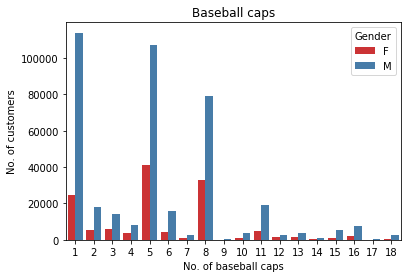

In [53]:
print(pd.crosstab(bfridaydf['Gender'],bfridaydf['Baseball Caps']))
ax1=sb.countplot(x='Baseball Caps',hue='Gender',data=bfridaydf,palette='Set1')
ax1.set(title='Baseball caps',xlabel='No. of baseball caps',ylabel='No. of customers')
plt.show()

Wine Tumblers   2.0   3.0    4.0    5.0    6.0   7.0    8.0   9.0   10.0  \
Gender                                                                     
F               9039   611   7451   6062   3242   133  16216  1480   718   
M              39442  2224  17774  19812  13009   482  46842  4111  2273   

Wine Tumblers   11.0  12.0  13.0   14.0   15.0   16.0   17.0  18.0  
Gender                                                              
F               2708  1706  2619  19309   6328   9318   2441   469  
M              11237  3713  7750  34849  30989  33284  10689  2261  


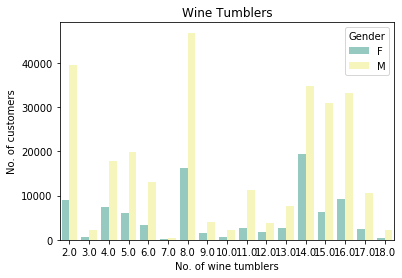

In [54]:
print(pd.crosstab(bfridaydf['Gender'],bfridaydf['Wine Tumblers']))
ax2=sb.countplot(x='Wine Tumblers',hue='Gender',data=bfridaydf,palette='Set3')
ax2.set(title='Wine Tumblers',xlabel='No. of wine tumblers',ylabel='No. of customers')
plt.show()

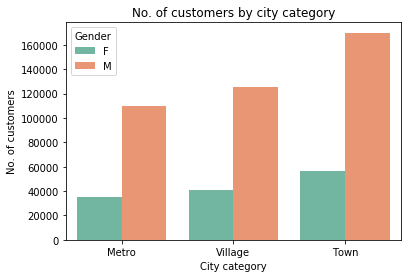

In [56]:
ax3=sb.countplot(x='City_Category',hue='Gender',palette='Set2',data=bfridaydf)
ax3.set(title='No. of customers by city category',xlabel='City category',ylabel='No. of customers')
plt.show()